In [ ]:
Part 1. Using Naïve Bayes to work with Text Data

In [ ]:
1. Representing text as data [6 pts]
Give a simple dataset

simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

1) Learn the 'vocabulary' of the training data: convert text into a matrix of token counts.
2) Transform training data into a 'document-term matrix' (which is a sparse matrix).
3) Print the sparse matrix.
4) Convert the sparse matrix to a dense matrix (Tip: you can use “toarray()”)
5) Examine the vocabulary and document-term matrix together
6) Transform testing data into a document-term matrix (using existing vocabulary)

use the test data as:
simple_test = ["please don't call me"]
Examine the vocabulary and document-term matrix together

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [25]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

# 1) Learn the 'vocabulary' of the training data
countV = CountVectorizer()
countV.fit(simple_train)
print(countV.get_feature_names())

['cab', 'call', 'me', 'please', 'tonight', 'you']


In [26]:
# 2) Transform training data into a 'document-term matrix'
simple_matrix = countV.transform(simple_train)
simple_matrix

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [27]:
# 3) Print the sparse matrix.
print(simple_matrix)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [28]:
# 4) Convert the sparse matrix to a dense matrix
simple_matrix_dense = simple_matrix.toarray()
simple_matrix_dense

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [29]:
# 5) Examine the vocabulary and document-term matrix together
data_together = pd.DataFrame(simple_matrix_dense, columns=countV.get_feature_names())
data_together

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [30]:
# 6) Transform testing data into a document-term matrix (using existing vocabulary)
simple_test = ["please don't call me"]
simple_test_matrix = countV.transform(simple_test)
simple_test_dense = simple_test_matrix.toarray()
simple_test_dense

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [31]:
# Examine the vocabulary and document-term matrix together
data_test_together = pd.DataFrame(simple_test_dense, columns=countV.get_feature_names())
data_test_together

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [ ]:
2. Analyzing SMS data with Naïve Bayes [10 pts]
Read into the data from the file “sms.tsv”; give the names of columns as ['label', 'message']; 
and print the first 10 samples to view part of the data. 
sms.tsv
        
1) Convert label to a numeric variable.
2) Then define the X and y
3) Split into training and testing sets by train_test_split(); and print the shape of training set and test set.
4) Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the following requirements, respectively:
  a) calculate accuracy of predictions
  b) give the confusion matrix
  c) calculate accuracy of predictions
  d) give the confusion matrix
  e) print message text for the false positives
  f) print message text for the false negatives

In [32]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv'
names_of_columns = ['label', 'message']
sms = pd.read_table(url, header=None, names=names_of_columns)
print(sms.shape)
sms.head(10)

(5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [33]:
# 1) Convert label to a numeric variable.
elements = sms['label'].value_counts()
print(elements)
sms['label'] = sms.label.map({'ham':0, 'spam':1})
print(sms['label'].value_counts())
sms

ham     4825
spam     747
Name: label, dtype: int64
0    4825
1     747
Name: label, dtype: int64


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [34]:
# 2) Then define the X and y
X = sms['message']
y = sms['label']
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [36]:
# 3) Split into training and testing sets by train_test_split(); and print the shape of training set and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [37]:
# 4) Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the following requirements, respectively:
countV2 = CountVectorizer()
countV2.fit(X_train)
X_train_matrix = countV2.transform(X_train)
X_test_matrix = countV2.transform(X_test)

In [43]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

accuracy of GaussianNB predictions:  0.8994974874371859
confusion matrix of GaussianNB: 
[[1079  129]
 [  11  174]]


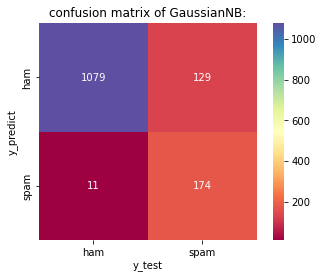

In [45]:
clf = GaussianNB()

clf.fit(X_train_matrix.toarray(), y_train)

y_predict2 = clf.predict(X_test_matrix.toarray())

# a) calculate accuracy of predictions
accuracy_clf = metrics.accuracy_score(y_test, y_predict2)
print("accuracy of GaussianNB predictions: ", accuracy_clf)

# c) give the confusion matrix
confusion_matrix_clf = metrics.confusion_matrix(y_test, y_predict2)
print("confusion matrix of GaussianNB: ")
print(confusion_matrix_clf)

sns.heatmap(confusion_matrix_clf, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True, 
            cmap="Spectral",
            xticklabels=["ham", "spam"], 
            yticklabels=["ham", "spam"])
plt.title("confusion matrix of GaussianNB:")
plt.xlabel('y_test')
plt.ylabel('y_predict');

In [46]:
# e) print message text for the false positives
print("false positives of GaussianNB")
print(X_test[(y_predict2 == 1) & (y_test == 0)])

# f) print message text for the false negatives
print("\nfalse negatives of GaussianNB")
print(X_test[(y_predict2 == 0) & (y_test == 1)])

false positives of GaussianNB
3465                                             My phone
1242    I want to show you the world, princess :) how ...
3214                                       What's ur pin?
574                                Waiting for your call.
4487                                 have * good weekend.
                              ...                        
2285                              Velly good, yes please!
2155    Oh god i am happy to see your message after 3 ...
1925                                                   Ok
1988                     No calls..messages..missed calls
3207                                        At home also.
Name: message, Length: 129, dtype: object

false negatives of GaussianNB
3530    Xmas & New Years Eve tickets are now on sale f...
1875    Would you like to see my XXX pics they are so ...
349     Fancy a shag? I do.Interested? sextextuk.com t...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets

In [47]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

accuracy of MultinomialNB predictions:  0.9885139985642498
confusion matrix of MultinomialNB: 
[[1203    5]
 [  11  174]]


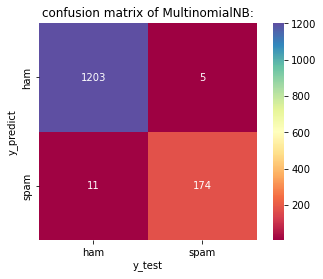

In [49]:
multiNB = MultinomialNB()

multiNB.fit(X_train_matrix, y_train)

y_predict = multiNB.predict(X_test_matrix)

# b) calculate accuracy of predictions
accuracy_multiNB = metrics.accuracy_score(y_test, y_predict)
print("accuracy of MultinomialNB predictions: ", accuracy_multiNB)

# d) give the confusion matrix
confusion_matrix_multiNB = metrics.confusion_matrix(y_test, y_predict)
print("confusion matrix of MultinomialNB: ")
print(confusion_matrix_multiNB)

sns.heatmap(confusion_matrix_multiNB, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True, 
            cmap="Spectral",
            xticklabels=["ham", "spam"], 
            yticklabels=["ham", "spam"])
plt.title("confusion matrix of MultinomialNB:")
plt.xlabel('y_test')
plt.ylabel('y_predict');

In [50]:
# e) print message text for the false positives
print("false positives of MultinomialNB")
print(X_test[(y_predict == 1) & (y_test == 0)])

# f) print message text for the false negatives
print("\nfalse negatives of MultinomialNB")
print(X_test[(y_predict == 0) & (y_test == 1)])

false positives of MultinomialNB
574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

false negatives of MultinomialNB
3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object


In [86]:
Part 2: Analyzing Boston housing (18 points)
Data: import load_boston from sklearn.datasets 
Goal: Using Linear Regression to analyze Boston housing

In [12]:
Tasks:
1) Read into the data and process it in the right format for using machine learning.
2) Then, use the DataFrame corr() method to show what features are correlated with each other.
3) The columns don't have any labels. Given the name of columns as 
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again.
4) Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. 
Please write codes to plot correlations by color same as (similar with) the following figure:
5) According to your output, answer the following questions: 
   In the above plot, what features are highly correlated? Which features are highly uncorrelated? 
6) Next, building the Linear Regression Model 
First, please split the data into two datasets as training and test sets. 
According to the four steps taught in class, please train the model by linear regression and predict.
Please print the coefficient for your model from the above results. 
It requires you to print each element of the coefficient and the corresponding the feature names.
Finally, to gain an understanding of how your model is performing, please score the model against 2 metrics: R squared 
and mean squared error. Write the lines of code to get your output; and answer the questions:
(a) What do the metrics of R Squared and Mean Squared Error do? What are the numbers telling you?
(b) What do you think could improve the model?

In [51]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# 1) Read into the data and process it in the right format for using machine learning.
X, y = load_boston(return_X_y = True)
boston = load_boston()
df = pd.DataFrame(boston.data)
print('Shape of Dataframe: ', df.shape)
df

Shape of Dataframe:  (506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [53]:
#2) Then, use the DataFrame corr() method to show what features are correlated with each other.
boston_cor = df.corr()
boston_cor

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [54]:
# 3) The columns don't have any labels. Given the name of columns as ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 
# 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again.
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
df = pd.DataFrame(boston.data, columns = columns)
boston_cor2 = df.corr()
boston_cor2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


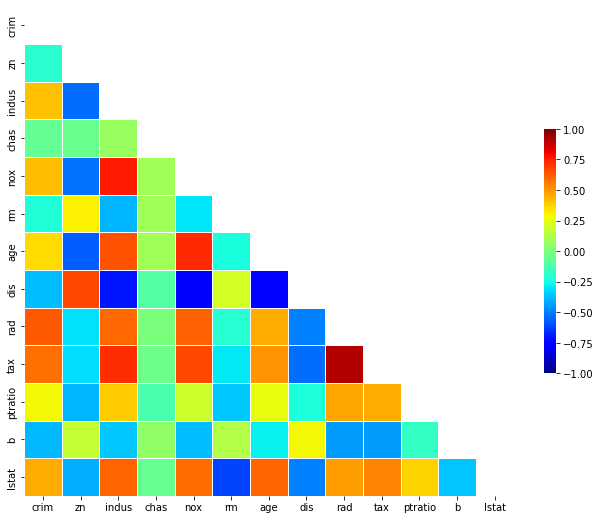

In [56]:
# 4) Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. 
# Please write codes to plot correlations by color same as (similar with) the following figure:
import seaborn as sns

mask = np.zeros_like(boston_cor2, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    boston_cor2,         
    mask=mask,     
    cmap="jet",       
    vmax=1,       
    vmin=-1,      
    center=0,      
    square=True,  
    linewidths=.5, 
    cbar_kws={"shrink": .5}  
)
plt.show()

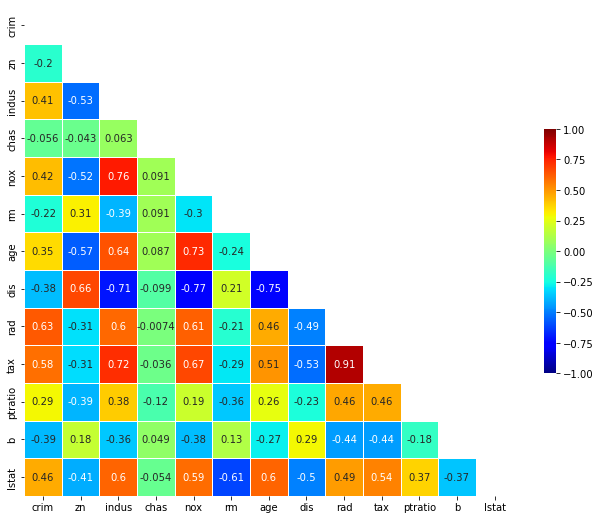

In [57]:
import seaborn as sns

mask = np.zeros_like(boston_cor2, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    boston_cor2,         
    mask=mask,     
    cmap="jet",     
    annot=True,    
    vmax=1,       
    vmin=-1,      
    center=0,      
    square=True,  
    linewidths=.5, 
    cbar_kws={"shrink": .5}  
)
plt.show()

In [ ]:
# 5) According to your output, answer the following questions: 
#    In the above plot, what features are highly correlated? Which features are highly uncorrelated? 
Highly correlated features: rad and tax
Highly uncorrelated features: chas and rad

In [58]:
# 6) Next, building the Linear Regression Model 
# First, please split the data into two datasets as training and test sets. 
from sklearn.model_selection import train_test_split
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [59]:
# According to the four steps taught in class, please train the model by linear regression and predict.
linModel = LinearRegression()
linModel.fit(X_train, y_train)
y_predict=linModel.predict(X_test)
y_predict

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

In [60]:
# Please print the coefficient for your model from the above results. 
# It requires you to print each element of the coefficient and the corresponding the feature names.
params = pd.Series(linModel.coef_, index=columns)
params

crim       -0.130800
zn          0.049403
indus       0.001095
chas        2.705366
nox       -15.957050
rm          3.413973
age         0.001119
dis        -1.493081
rad         0.364422
tax        -0.013172
ptratio    -0.952370
b           0.011749
lstat      -0.594076
dtype: float64

In [61]:
# Finally, to gain an understanding of how your model is performing, please score the model against 2 metrics: R squared 
# and mean squared error. Write the lines of code to get your output; and answer the questions:
from sklearn.metrics import r2_score
from skimage.metrics import mean_squared_error
#R squared
score = r2_score(y_test, y_predict)
print("R squared score is: ",score)
#MSE
error = mean_squared_error(y_test, y_predict)
print("MSE is: ",error)

R squared score is:  0.7334492147453092
MSE is:  20.869292183770682


In [ ]:
# (a) What do the metrics of R Squared and Mean Squared Error do? What are the numbers telling you?
R squared is a quantification of how well the linear regression model fits the dataset. 
The idea is that if more samples are added, the coefficients will show the probability of the new point falling on the line. 
Even if there is a strong association between the two variables, the determination does not prove causality.
The mean squared error represents the average of the squared differences between the original and predicted values in the dataset. 
It measures the variance of the residuals.The smaller the mean squared error, the closer you are to finding the best fit line. 

R squared of 0.73 means that the predictors explain about 73% of the variation in our response variable.
The lower the MSE the higher the accuracy of prediction. The score of 20 is quite high.
Based on these two parameters, the LinearRegression model seems not fit dataset very well.

# (b) What do you think could improve the model?
Reduce multi-collinearity, remove the feature with higher correlation, such as rad and tax in this dataset.
Handle null and missing values.But this dataset has no null values.
Use feature selection and scaling to make the data more standardized and unified.
Tune hyperparameters of the LinearRegression Model.

In [ ]:
Part 3: Predicting Bicycle Traffic (30 points)
Goal: Join the bike dataset with the weather dataset, and try to determine the extent to which weather and seasonal factors—
    temperature, precipitation, and holidays — affect the volume of bicycle traffic through a bridge.
Tasks:
1) Load the two datasets, indexing by date. Explore the two datasets by showing size, shape and first several samples with features, etc.

2) Compute the total daily bicycle traffic as a new dataframe.

3) Add binary columns that indicate the day of the week (Monday to Sunday) to account for the patterns of bike use that vary every day.

4) Similarly, add an indicator to show the behavior of the riders on holidays (Federal holidays).
[Hint: from pandas.tseries.holiday import USFederalHolidayCalendar]

5) Add the average temperature and total precipitation to the data. In addition to the centimeters of precipitation, add a flag 
that indicates whether a day is dry (has zero precipitation).
[Hint: TMIN and TMAX are minimum and maximum temperatures. PRCP is the precipitation in centimeter.]

6) Combine the three columns in weather dataframe (PRCP, average temperature, and dry days) into the new bicycle dataframe in question 2.

7) Add a counter that increases from day 1, and measures how many years have passed.

8) Make sure the data is clean: drop any rows with null values
The final column names for “feature matrix” should be:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'dry day', 'Temp', 'annual']
The target array should be: “Total” (from question 2)

9) Fit a linear regression model to the ready data. And compare the total and predicted bicycle traffic visually.

10) Output the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count.

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [63]:
# 1) Load the two datasets, indexing by date.
bicycle = pd.read_csv('C:/Users/dellpc/Desktop/BridgeBicycle.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('C:/Users/dellpc/Desktop/BridgeWeather.csv', index_col='DATE', parse_dates=True)
# Explore the two datasets by showing size, shape and first several samples with features, etc.
print('BridgeBicycle.csv size: ',bicycle.size)
print('BridgeBicycle.csv shape: ',bicycle.shape)
print('BridgeBicycle.csv head of 5: ')
bicycle.head(5)

BridgeBicycle.csv size:  112320
BridgeBicycle.csv shape:  (56160, 2)
BridgeBicycle.csv head of 5: 


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-02-28 23:00:00,5.0,6.0
2019-02-28 22:00:00,4.0,27.0
2019-02-28 21:00:00,16.0,32.0
2019-02-28 20:00:00,16.0,50.0
2019-02-28 19:00:00,39.0,59.0


In [64]:
print('BridgeBicycle.csv tail of 5: ')
bicycle.tail(5)

BridgeBicycle.csv tail of 5: 


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 04:00:00,6.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 00:00:00,4.0,9.0


In [65]:
print('BridgeWeather.csv size: ',weather.size)
print('BridgeWeather.csv shape: ',weather.shape)
print('BridgeWeather.csv head of 5: ')
weather.head(5)

BridgeWeather.csv size:  67860
BridgeWeather.csv shape:  (2340, 29)
BridgeWeather.csv head of 5: 


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,16.33,",,X",NaN,NaN,0.0,...,46,",,X",10,",,X",20.0,",,X",23.0,",,X",28.0,",,X"
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,14.54,",,X",NaN,NaN,0.0,...,47,",,X",20,",,X",20.0,",,X",21.0,",,X",25.1,",,X"
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,12.75,",,X",NaN,NaN,0.0,...,48,",,X",360,",,X",360.0,",,X",17.9,",,X",21.9,",,X"
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,11.41,",,X",NaN,NaN,0.0,...,46,",,X",20,",,X",20.0,",,X",17.0,",,X",21.0,",,X"
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2.91,",,X",NaN,NaN,0.0,...,46,",,X",30,",,X",10.0,",,X",12.1,",,X",14.1,",,X"


In [66]:
print('BridgeWeather.csv tail of 5: ')
weather.tail(5)

BridgeWeather.csv tail of 5: 


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
2019-02-24,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,8.72,",,W",NaN,NaN,0.01,...,37,",,D",10,",,W",30.0,",,W",15.0,",,W",17.0,",,W"
2019-02-25,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,11.18,",,W",NaN,NaN,0.00,...,32,",,D",350,",,W",340.0,",,W",21.0,",,W",25.1,",,W"
2019-02-26,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,12.75,",,W",NaN,NaN,0.00,...,30,",,D",80,",,W",90.0,",,W",25.9,",,W",36.0,",,W"
2019-02-27,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,8.05,",,W",NaN,NaN,0.00,...,33,",,D",40,",,W",340.0,",,W",15.0,",,W",25.9,",,W"
2019-02-28,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,5.14,",,W",NaN,NaN,0.00,...,30,",,D",230,",,W",220.0,",,W",13.0,",,W",17.0,",,W"


In [67]:
# 2) Compute the total daily bicycle traffic as a new dataframe.
daily_total = bicycle.resample('d').sum()
daily_total['Total'] = daily_total.sum(axis=1)
daily_total = daily_total[['Total']]
daily_total

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0
...,...
2019-02-24,933.0
2019-02-25,2643.0
2019-02-26,2803.0


In [68]:
# 3) Add binary columns that indicate the day of the week (Monday to Sunday) to account for the patterns of bike use that vary every day.
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily_total[week[i]] = (daily_total.index.dayofweek == i).astype(float)
daily_total

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2019-02-24,933.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-02-25,2643.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-26,2803.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# 4) Similarly, add an indicator to show the behavior of the riders on holidays (Federal holidays).
from pandas.tseries.holiday import USFederalHolidayCalendar
holidays = USFederalHolidayCalendar().holidays('2012','2019')
daily_total = daily_total.join(pd.Series(1,index=holidays,name='holiday'))
daily_total['holiday'].fillna(0,inplace=True)
daily_total

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2019-02-24,933.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-02-25,2643.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-26,2803.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# 5) Add the average temperature and total precipitation to the data. In addition to the centimeters of precipitation, add a flag 
# that indicates whether a day is dry (has zero precipitation).
# 6)Combine the three columns in weather dataframe (PRCP, average temperature, and dry days) into the new bicycle dataframe in question 2.

weather['Temp'] = (weather['TMIN'] + weather['TMAX']) / 2
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily_total = daily_total.join(weather[['PRCP', 'dry day', 'Temp']])
daily_total

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,dry day,Temp
Date,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1,56.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,1,56.5
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,1,59.5
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1,60.5
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,933.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.01,0,39.5
2019-02-25,2643.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,38.0
2019-02-26,2803.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,36.5


In [71]:
# 7) Add a counter that increases from day 1, and measures how many years have passed.
daily_total['annual'] = (daily_total.index - daily_total.index[0]).days / 365.
daily_total

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,dry day,Temp,annual
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1,56.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,1,56.5,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,1,59.5,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1,60.5,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,60.5,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,933.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.01,0,39.5,6.397260
2019-02-25,2643.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,38.0,6.400000
2019-02-26,2803.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,36.5,6.402740


In [72]:
# 8) Make sure the data is clean: drop any rows with null values
# The final column names for “feature matrix” should be:
# column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'dry day', 'Temp', 'annual']
# The target array should be: “Total” (from question 2)
daily_total.dropna(axis=0, how='any', inplace=True)
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'dry day', 'Temp', 'annual']
X = daily_total.drop('Total',axis=1)
y = daily_total['Total']
X

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,dry day,Temp,annual
Date,,,,,,,,,,,,
2012-10-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1,56.0,0.000000
2012-10-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,1,56.5,0.002740
2012-10-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,1,59.5,0.005479
2012-10-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1,60.5,0.008219
2012-10-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,60.5,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.01,0,39.5,6.397260
2019-02-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,38.0,6.400000
2019-02-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,36.5,6.402740


In [73]:
# 9) Fit a linear regression model to the ready data. And compare the total and predicted bicycle traffic visually.
LRModel = LinearRegression(fit_intercept=False)
LRModel.fit(X,y)
daily_total['Perdict'] = LRModel.predict(X)
daily_total[['Total','Perdict']]

,Total,Perdict
Date,,
2012-10-03,3521.0,3629.494101
2012-10-04,3475.0,3520.806369
2012-10-05,3148.0,3386.371322
2012-10-06,2006.0,2098.174776
2012-10-07,2142.0,2017.226752
...,...,...
2019-02-24,933.0,447.418552
2019-02-25,2643.0,2687.890167
2019-02-26,2803.0,2719.652778


<AxesSubplot:xlabel='Date'>

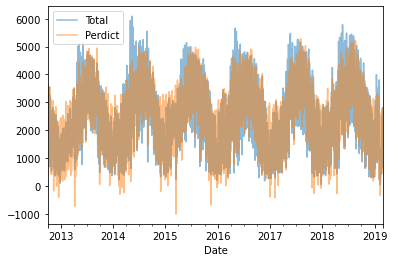

In [74]:
daily_total[['Total', 'Perdict']].plot(alpha=0.5)

In [75]:
# 10) Output the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count.
params = pd.Series(LRModel.coef_, index=X.columns)
params

Mon        -411.931265
Tue        -288.898213
Wed        -315.392546
Thu        -454.647291
Fri        -771.946172
Sat       -2121.169096
Sun       -2202.224770
holiday   -1285.388101
PRCP       -801.063771
dry day     533.437912
Temp         60.918727
annual       39.292481
dtype: float64

In [76]:
from sklearn.utils import resample
np.random.seed(42)
err = np.std([LRModel.fit(*resample(X, y)).coef_ for i in range(1000)], 0)
print(pd.DataFrame({'Changes': params.round(0), 'Range': err.round(0)}))

         Changes  Range
Mon       -412.0   70.0
Tue       -289.0   68.0
Wed       -315.0   71.0
Thu       -455.0   70.0
Fri       -772.0   69.0
Sat      -2121.0   66.0
Sun      -2202.0   67.0
holiday  -1285.0  105.0
PRCP      -801.0   48.0
dry day    533.0   26.0
Temp        61.0    1.0
annual      39.0    6.0


In [ ]:
# Feature Contributes Conclusion:
More people ride bikes on weekdays than on weekends and holidays.
For every holiday, an average of 1,285 ± 105 fewer people ride bicycles; 
for every precipitation, an average of 801 ± 48 fewer people ride bicycles; 
when the weather is dry, an average of 533 ± 26 more people ride bicycles; 
for every 1 rise in temperature, an average of 61 ± 1 more people ride bicycles; 
and as the number of years increases, an average of 39 ± 6 more people ride bicycles each year.

In [ ]:
Part 4: Analyzing Advertisement (15 points)
Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset
1) Using 10-fold cross-validation with the features of media with and without “Newspaper”.
2) Calculating the average MSE score with and without “Newspaper”.
3) Analyzing the MSE scores from the two models and explaining.

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [78]:
ad = pd.read_csv('C:/Users/dellpc/Desktop/Advertising.csv', index_col=0)
ad

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [107]:
# With“Newspaper”
# 1) Using 10-fold cross-validation with the features of media with "Newspaper”.
# 2) Calculating the average MSE score with“Newspaper”.
LRModel = LinearRegression()
features = ['TV', 'Radio', 'Newspaper']
X = ad[features]
y = ad['Sales']
scores = cross_val_score(LRModel, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)
print('mean score with Newspaper: ',np.mean(-scores))

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]
mean score with Newspaper:  3.0599676181185136


In [109]:
# Without“Newspaper”
# 1) Using 10-fold cross-validation with the features of media without "Newspaper”.
# 2) Calculating the average MSE score without“Newspaper”.
LRModel2 = LinearRegression()
features2 = ['TV', 'Radio']
X2 = ad[features2]
y2 = ad['Sales']
scores2 = cross_val_score(LRModel2, X2, y2, cv=10, scoring='neg_mean_squared_error')
print(scores2)
print('mean score without Newspaper: ',np.mean(-scores2))

[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]
mean score without Newspaper:  3.0139191555404694


In [ ]:
# 3) Analyzing the MSE scores from the two models and explaining.
MSE refers to the expected value of the squared difference between the parameter estimate and the true value of the parameter, 
which cannot be negative according to the formula; 
however, according to sklearn.model, it returns a negative MSE, so I finally turned them both positive
Based on the rules of sklearn, the larger of the negative score value is, the better the performance. 
Therefore, based on the two average MSE parameters and their negative values,
we can find that the model after dropping the feature 'Newspaper' performs better than the model with this feature.

In [ ]:
Part 5: Classifying Digits (21 points)
Dataset: scikit-learn MNIST handwritten digits
Goal: identifying characters in an image.
1) Visualize the first one hundred of these digits.
2) Use PCA and Isomap for dimensionality reduction to plot in two dimensions.
3) Analyze the visualization to find the digits that are roughly prone to be mislabeled.
4) Use Naïve Bayes classifier to classify the digits and print out the classification report for this classifier.
5) Use Random Forest classifier to classify the digits and print out the classification report for this classifier.
6) In addition to the default number of estimators, try to find the best number of estimators (i.e. tune the parameter) 
to get the best Random Forest classifier.
7) Plot the confusion matrix for the two classifiers (Naïve Bayes and Random Forest)

In [85]:
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [86]:
from sklearn.datasets import fetch_openml
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [87]:
print(data.shape)
print(np.unique(labels))

(70000, 784)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


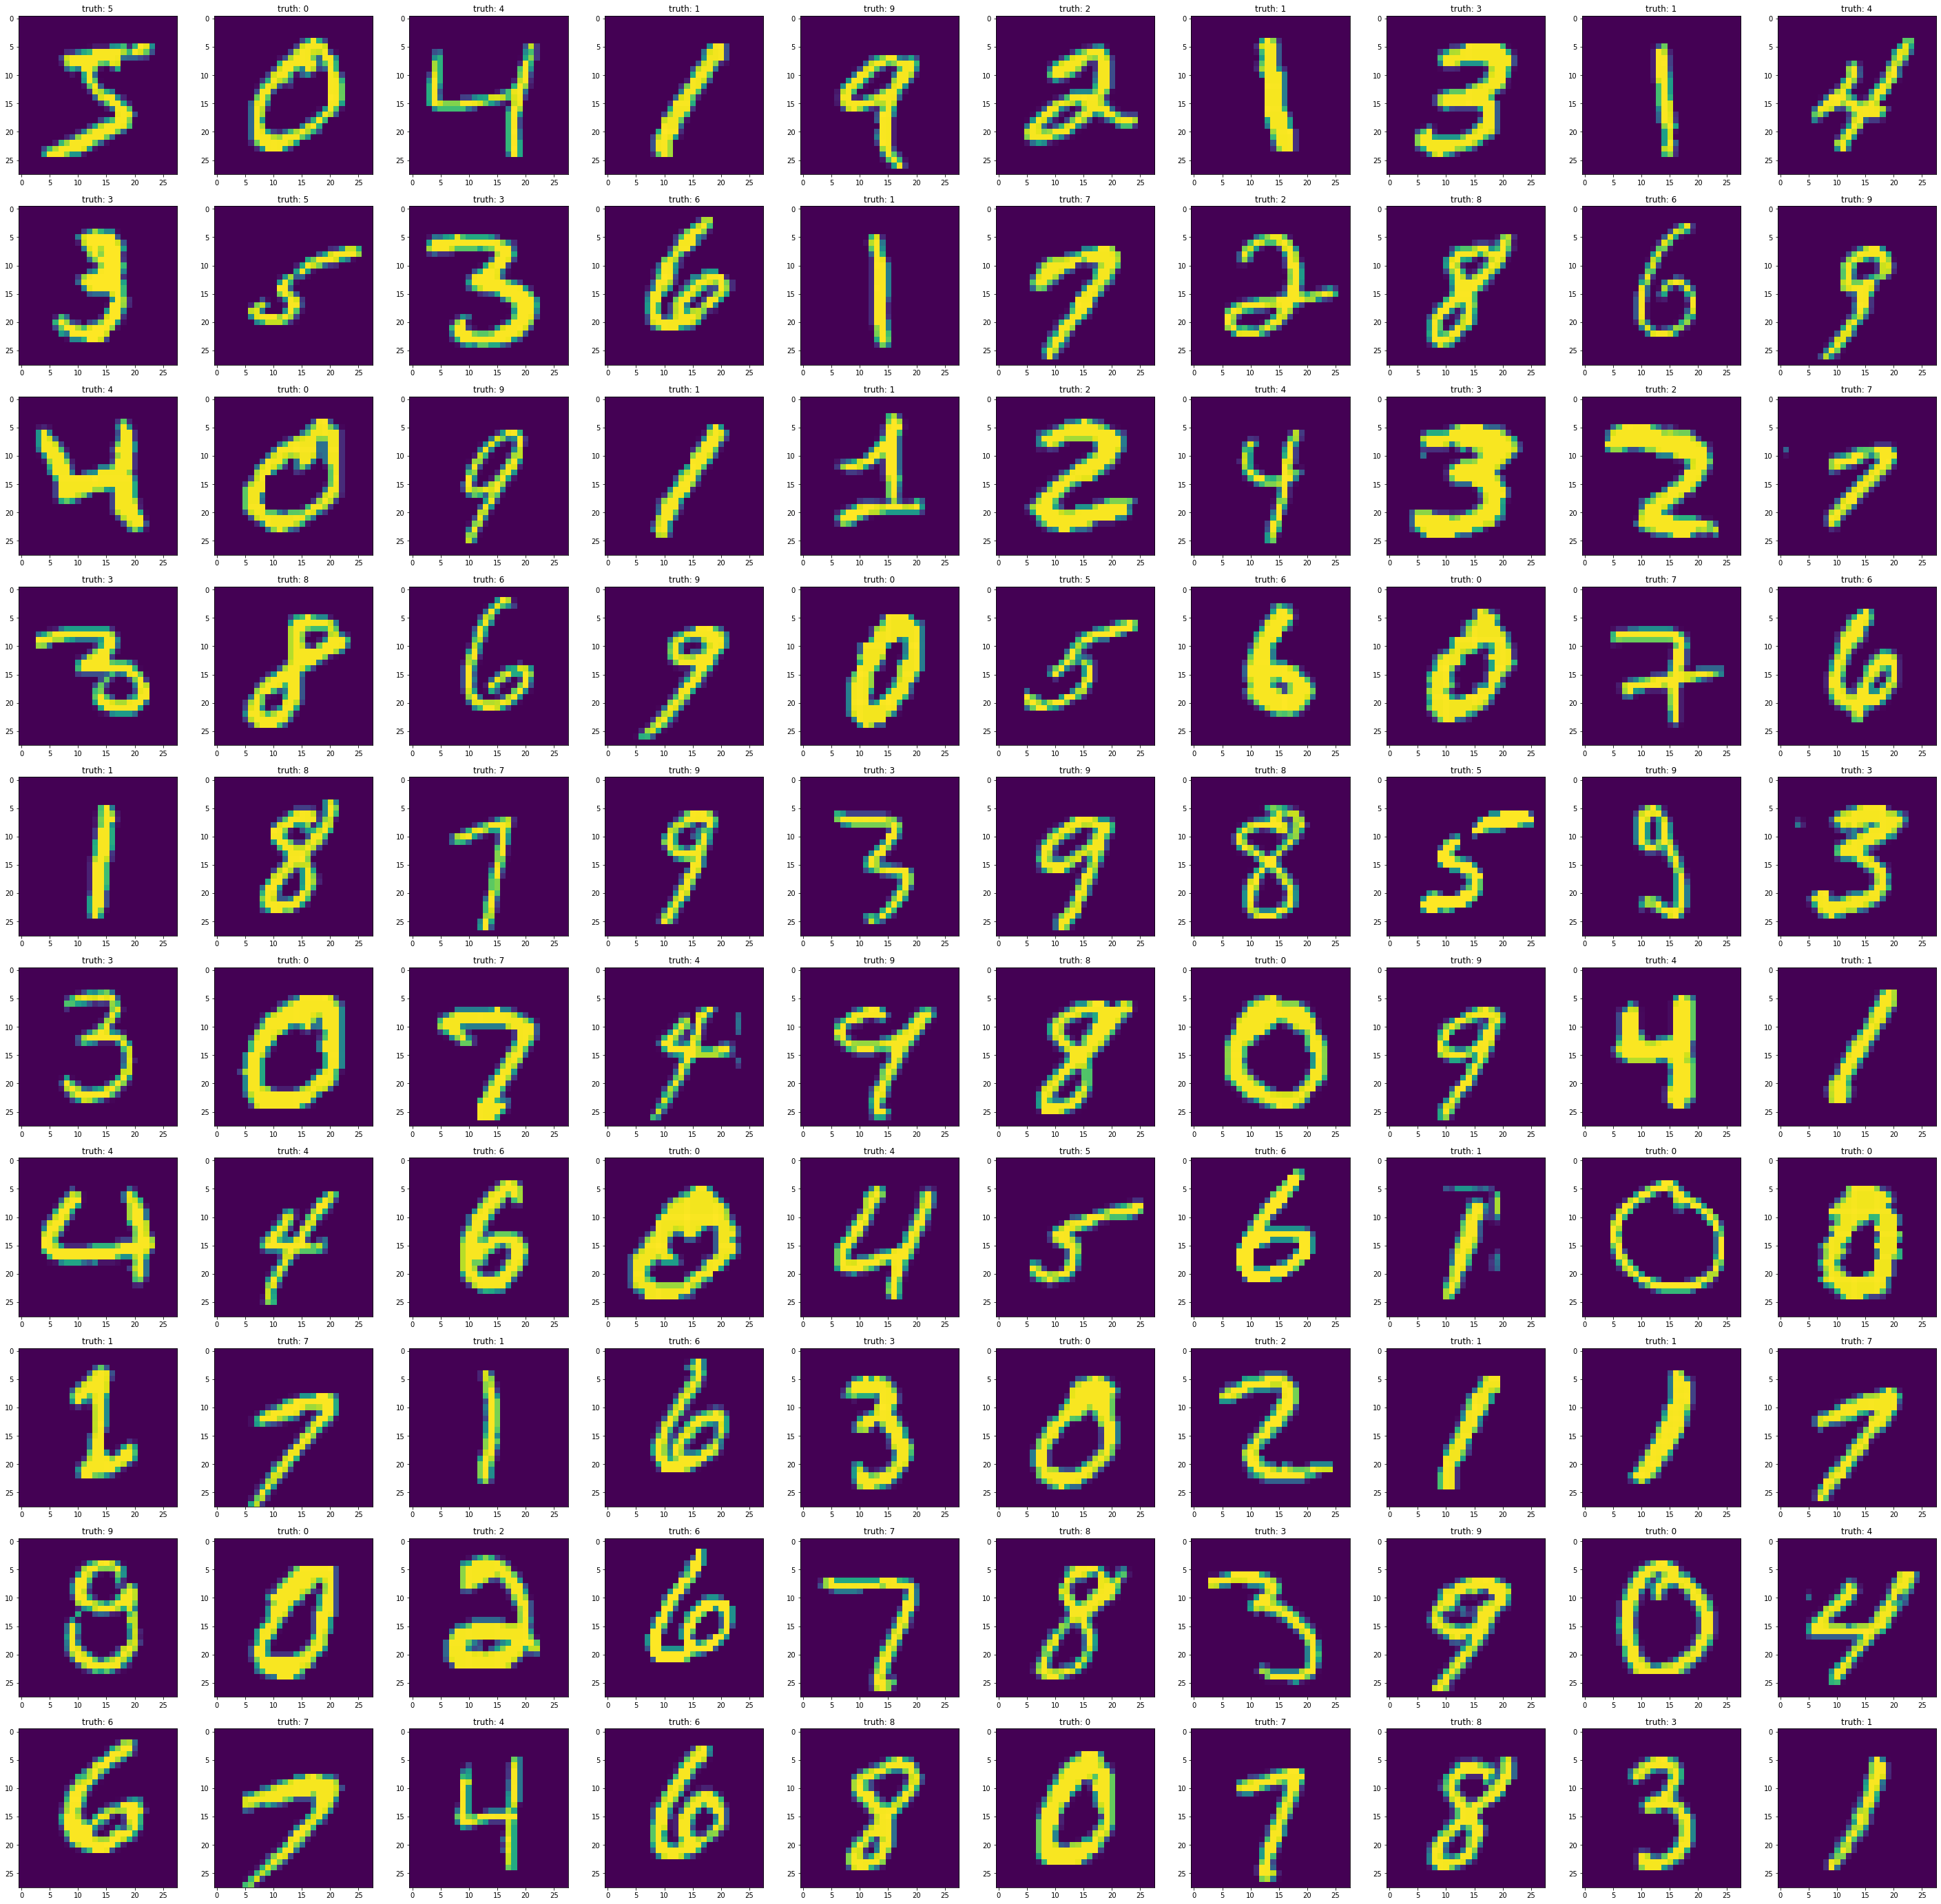

In [88]:
# 1) Visualize the first one hundred of these digits.
datas = data / 255.
labels = labels.astype('int')
images = datas.values.reshape(datas.shape[0], 28, 28)
plt.figure(figsize=(50,50))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(images[i])
    plt.title('truth: {}'.format(labels[i]))

Text(0, 0.5, 'Dimension_y')

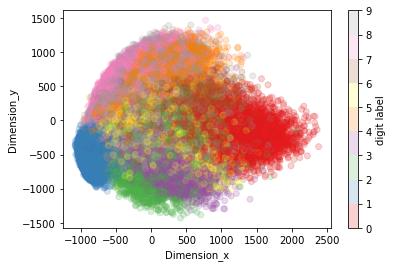

In [87]:
# 2) Use PCA and Isomap for dimensionality reduction to plot in two dimensions.
#PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.2, cmap='Set1')
plt.colorbar(label='digit label', ticks=range(10))
plt.xlabel('Dimension_x')
plt.ylabel('Dimension_y')

Text(0, 0.5, 'Dimension_y')

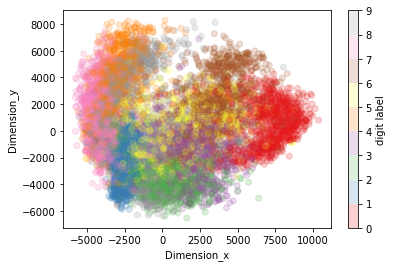

In [88]:
#Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
# Because the dataset is too large and Jupyter compilation times out when using Isomap, 
# only the first 10,000 data are selected here for visualization
data_projected = iso.fit_transform(data[:10000])

plt.scatter(data_projected[:,0], data_projected[:,1], c=labels[:10000], alpha=0.2, cmap='Set1')
plt.colorbar(label='digit label', ticks=range(10))
plt.xlabel('Dimension_x')
plt.ylabel('Dimension_y')

In [ ]:
# 3) Analyze the visualization to find the digits that are roughly prone to be mislabeled.
5,7,9 are easily confused by analyzing the overlap and distribution in the graph.

In [90]:
# 4) Use Naïve Bayes classifier to classify the digits and print out the classification report for this classifier.
#Naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
ac = accuracy_score(y_model, y_test)
print("accuracy score is: ", ac)
print(classification_report(y_test, y_model))

accuracy score is:  0.5551428571428572
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1380
           1       0.78      0.94      0.85      1632
           2       0.85      0.28      0.42      1433
           3       0.71      0.37      0.48      1431
           4       0.86      0.19      0.32      1328
           5       0.63      0.05      0.10      1297
           6       0.65      0.93      0.76      1331
           7       0.88      0.30      0.45      1444
           8       0.27      0.62      0.38      1351
           9       0.37      0.93      0.53      1373

    accuracy                           0.56     14000
   macro avg       0.68      0.55      0.51     14000
weighted avg       0.68      0.56      0.52     14000



In [91]:
# 5) Use Random Forest classifier to classify the digits and print out the classification report for this classifier.
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train , y_train)
y_model2 = rforest.predict(X_test)
ac2 = accuracy_score(y_model2, y_test)
print("accuracy score is: ", ac2)
print(classification_report(y_test, y_model2))

accuracy score is:  0.9688571428571429
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1380
           1       0.99      0.98      0.99      1632
           2       0.97      0.97      0.97      1433
           3       0.96      0.95      0.96      1431
           4       0.97      0.97      0.97      1328
           5       0.97      0.96      0.97      1297
           6       0.98      0.98      0.98      1331
           7       0.97      0.97      0.97      1444
           8       0.96      0.96      0.96      1351
           9       0.95      0.95      0.95      1373

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [92]:
# 6) In addition to the default number of estimators, try to find the best number of estimators (i.e. tune the parameter) 
# to get the best Random Forest classifier.
from pprint import pprint
# parameters used by random forest model
print('Parameters currently in use:\n')
pprint(rforest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


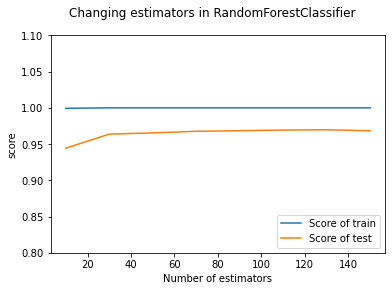

In [101]:
# 6) In addition to the default number of estimators, try to find the best number of estimators (i.e. tune the parameter) 
# to get the best Random Forest classifier.
from sklearn.ensemble import RandomForestClassifier
def estimators_best(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(10,160,step=20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        rfc = RandomForestClassifier(n_estimators=num)
        rfc.fit(X_train,y_train)
        training_scores.append(rfc.score(X_train,y_train))
        testing_scores.append(rfc.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Score of train")
    ax.plot(nums,testing_scores,label="Score of test")
    ax.set_xlabel("Number of estimators")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0.8,1.1)
    plt.suptitle("Changing estimators in RandomForestClassifier")
    plt.show()
estimators_best(X_train,X_test,y_train,y_test) 

In [102]:
#From the above graph, we can see that when n_estimator=120, the train and tes scores are closer and better
#and when the estimators get higher, the test score seems will decase
#use the n_estimators=120 to re-train the model, we can find that the score is 0.96957, which better than 0.96885 with default parameters
rforest2 = RandomForestClassifier(n_estimators=120)
rforest2.fit(X_train , y_train)
y_model3 = rforest2.predict(X_test)
ac3 = accuracy_score(y_model3, y_test)
print("accuracy score is: ", ac3)
print(classification_report(y_test, y_model3))

accuracy score is:  0.9695714285714285
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1380
           1       0.99      0.99      0.99      1632
           2       0.97      0.97      0.97      1433
           3       0.97      0.95      0.96      1431
           4       0.97      0.97      0.97      1328
           5       0.97      0.97      0.97      1297
           6       0.98      0.98      0.98      1331
           7       0.96      0.98      0.97      1444
           8       0.96      0.95      0.96      1351
           9       0.95      0.95      0.95      1373

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



Text(69.0, 0.5, 'true value')

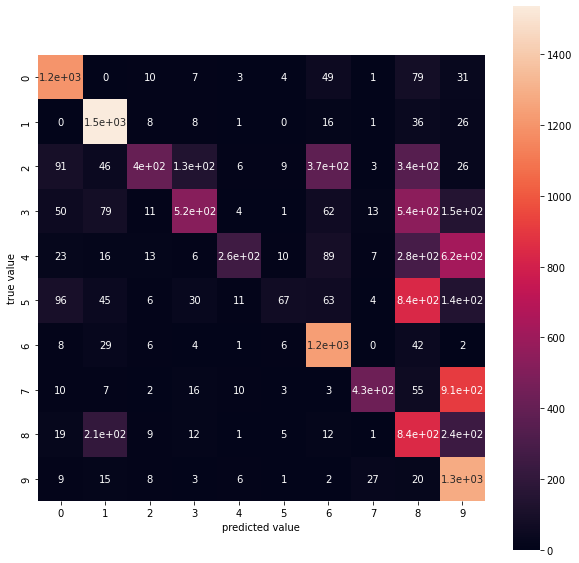

In [105]:
#7) Plot the confusion matrix for the two classifiers (Naïve Bayes and Random Forest)
#Naïve Bayes classifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_model)
plt.figure(figsize=(10, 10))
sns.heatmap(mat,square=True, annot=True, cbar=True)

plt.xlabel('predicted value')
plt.ylabel('true value')

Text(69.0, 0.5, 'true value')

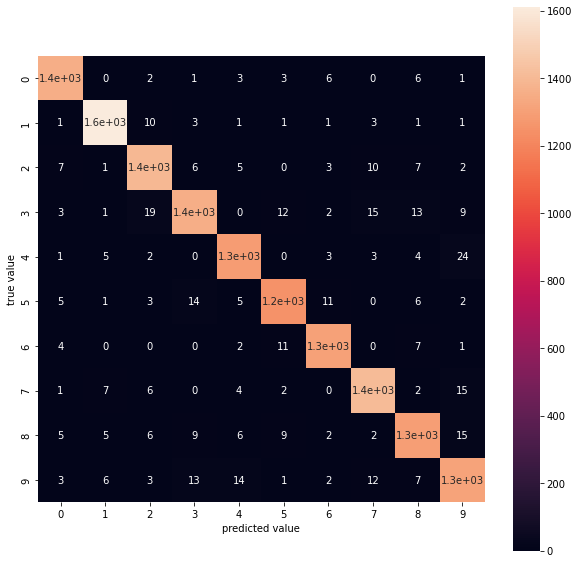

In [106]:
#Random Forest classifier
mat2 = confusion_matrix(y_test, y_model3)
plt.figure(figsize=(10, 10))
sns.heatmap(mat2, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')